In [1]:
from sklearn.datasets import *
from sklearn.tree import *
import numpy as np
import dtreeviz
from IPython.display import display_svg, SVG, Image
import graphviz.backend as be

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

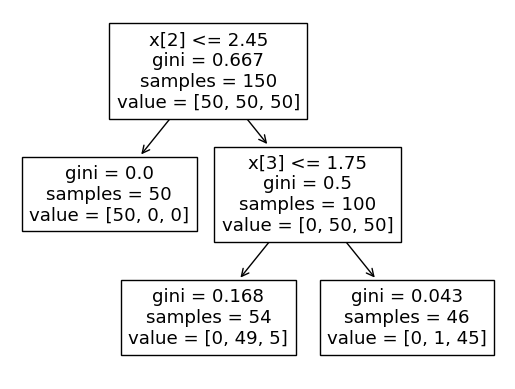

In [4]:
plot_tree(clf)

# Classification 

In [5]:
viz_model = dtreeviz.model(clf,
X_train=X, y_train=y,feature_names=iris.feature_names,target_name='iris',class_names=iris.target_names)

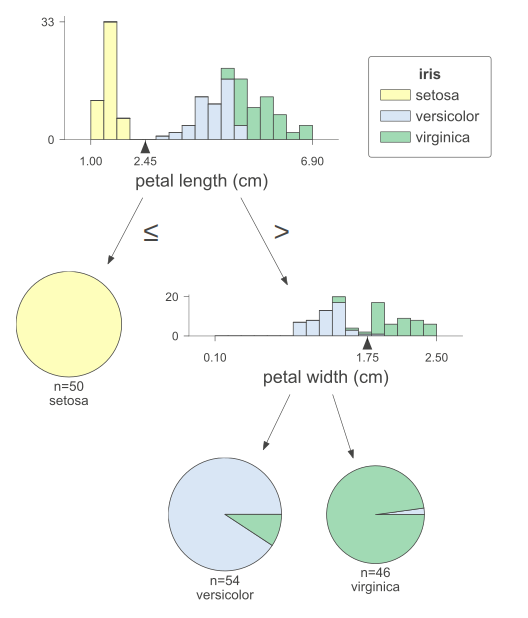

In [6]:
viz_model.view(scale=2)

# Regression 

In [7]:
import pandas as pd 
cdf= DecisionTreeRegressor(max_depth=1)
df= pd.read_csv('BostonHousing.csv')

In [8]:
X= df.iloc[:, :-1].values
Y= df.iloc[:, -1].values

In [9]:
cdf.fit(X,Y)

DecisionTreeRegressor(max_depth=1)

In [10]:
viz_model = dtreeviz.model(cdf,
X_train=X, y_train=Y, feature_names=df.columns, target_name='medv', class_names=df['medv'].unique())

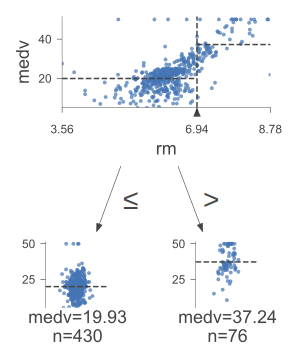

In [11]:
viz_model.view(scale=2)

# Horizontal Tree ploting

In [12]:
viz_model = dtreeviz.model(cdf,
X_train=X, y_train=Y, feature_names=df.columns, target_name='medv', class_names=df['medv'].unique())

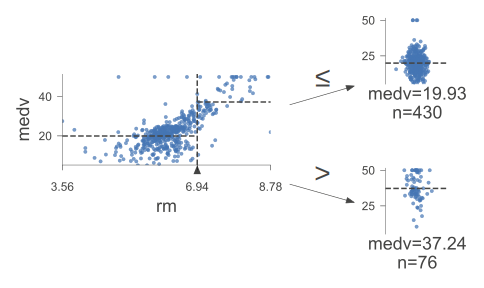

In [13]:
viz_model.view(orientation='LR', scale=2)

# How decision tree classify an instance or show prediction for the instance 

In [14]:
iris=load_iris()
X_train=iris.data
Y_train= iris.target

In [15]:
clss= DecisionTreeClassifier()
clss.fit(X_train, Y_train)

DecisionTreeClassifier()

In [16]:
x=iris.data[np.random.randint(0, len(iris.data)), :]
viz = dtreeviz.model(
    clss, 
    X_train=X_train,
    y_train=Y_train,
    feature_names= iris.feature_names,
    class_names= iris.target_names,
)

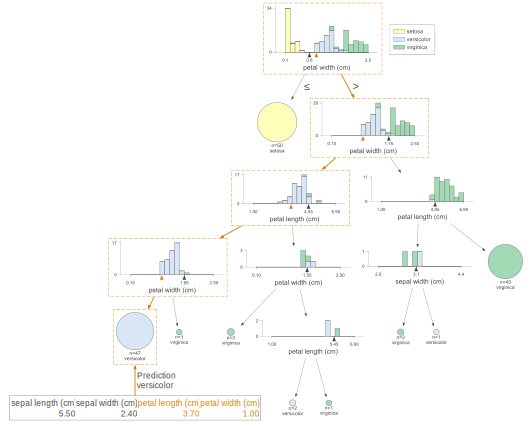

In [17]:
viz.view(x=x, scale=.75)

# Show just path 

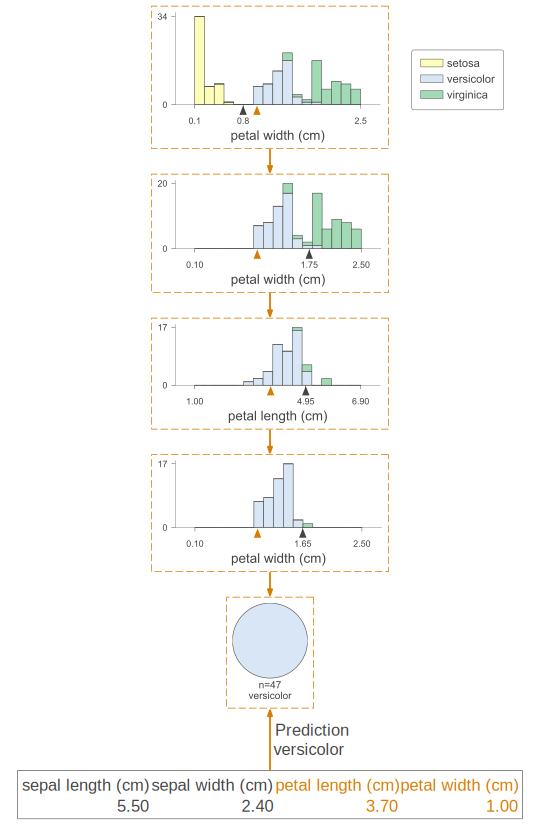

In [18]:
viz.view(x=x, show_just_path=True, scale=1.5)

# Explain the prediction path in plain English

In [19]:
print(viz.explain_prediction_path(x=x))

petal length (cm) < 4.95
0.8 <= petal width (cm)  < 1.65



# Feature Space Partioning

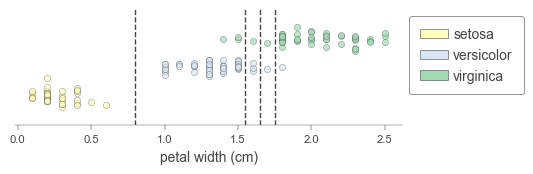

In [20]:
viz.ctree_feature_space(features=['petal width (cm)'], show={'splits', 'legend'}, figsize=(5,1.5))

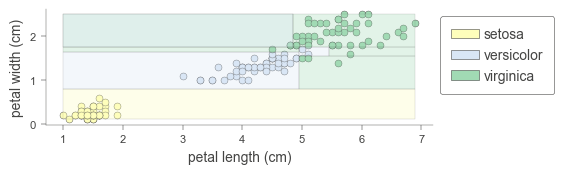

In [21]:
viz.ctree_feature_space(features=['petal length (cm)', 'petal width (cm)'], show={'splits', 'legend'}, figsize=(5,1.5))

# Show node number 

In [22]:
viz1= dtreeviz.model(
 clf,
 X_train=iris.data,
 y_train=iris.target,
 feature_names= iris.feature_names,
 class_names= iris.target_names,
)

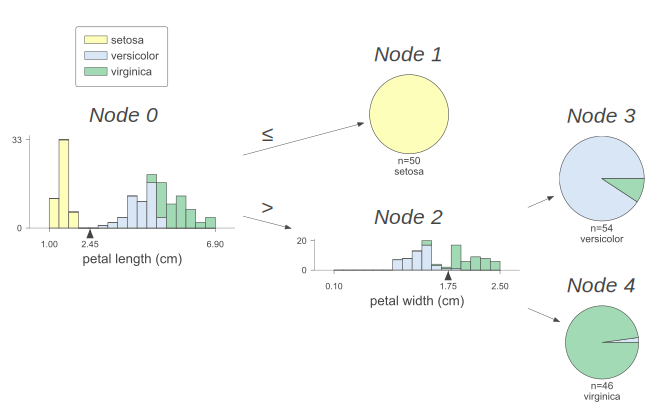

In [23]:
viz1.view(orientation='LR', scale=1.5, histtype='barstacked', show_node_labels=True)

# Without any graph 

In [24]:
viz2= dtreeviz.model(
 clf,
 X_train=iris.data,
 y_train=iris.target,
 feature_names= iris.feature_names,
 class_names= iris.target_names,
)

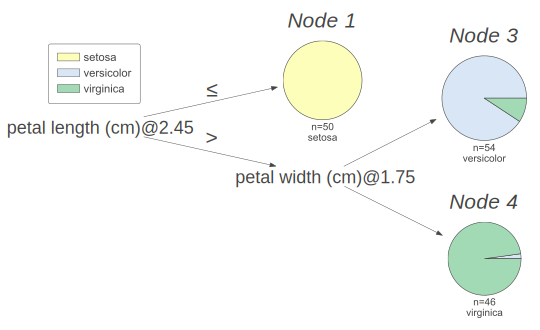

In [25]:
viz2.view(orientation='LR', scale=1.5, histtype='barstacked', show_node_labels=True, fancy=False)

In [26]:
viz3= dtreeviz.model(
 clf,
 X_train=iris.data,
 y_train=iris.target,
 feature_names= iris.feature_names,
 class_names= iris.target_names,
)

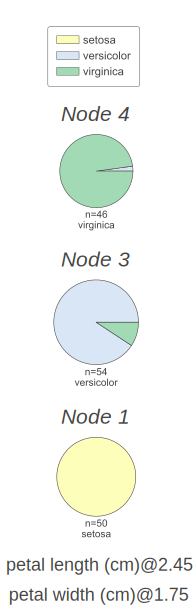

In [27]:
viz3.view(orientation='LR', scale=1.5, histtype='barstacked', show_node_labels=True, fancy=False, show_just_path=True)

 ### How to examine the number of training data instances that are grouped into each leaf node:

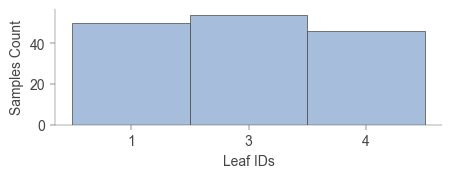

In [28]:
viz3.leaf_sizes(figsize=(5,1.5))

## shows the proportion of each kind of training instance in the various leaves.

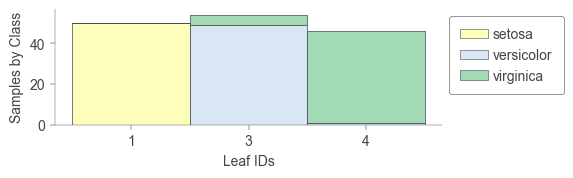

In [29]:
viz3.ctree_leaf_distributions(figsize=(5,1.5))

# How to check the node stats? 

In [30]:
viz3.node_stats(node_id=3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,54.0,54.0,54.0,54.0
mean,5.951852,2.748148,4.337037,1.337037
std,0.547289,0.310046,0.544023,0.192595
min,4.9,2.0,3.0,1.0
25%,5.6,2.5,4.0,1.2
50%,6.0,2.8,4.4,1.3
75%,6.3,3.0,4.675,1.5
max,7.2,3.4,5.8,1.7


# Regression with decision tree

In [31]:
from sklearn.model_selection import train_test_split
df_cars = pd.read_csv("cars.csv")
X = df_cars[['WGT']]
Y = df_cars['MPG']
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
dtr= DecisionTreeRegressor(max_depth=2, criterion='squared_error')

In [33]:
dtr.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=2)

In [34]:
viz5= dtreeviz.model(
 dtr, 
 X_train= X_train,
 y_train= Y_train,
 target_name='MPG',
 feature_names='WGT'
)

c:\Users\SC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


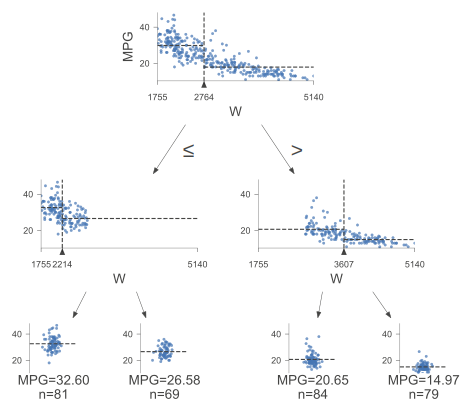

In [35]:
viz5.view(scale=1.5)

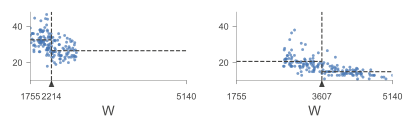

In [36]:
viz5.view(depth_range_to_display=[1,1], scale=1.5)

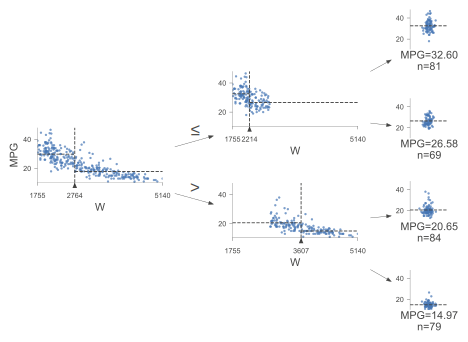

In [37]:
viz5.view(orientation='LR', scale=1.2)

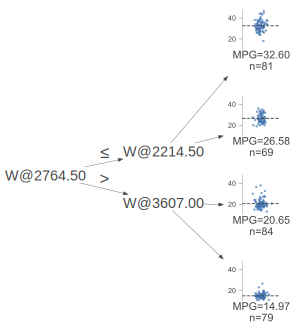

In [38]:
viz5.view(fancy=False, orientation='LR', scale=1.2)

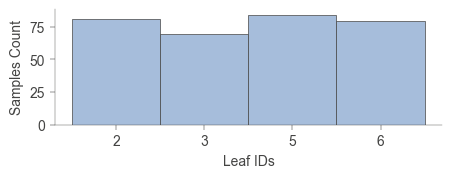

In [39]:
# Examining the leaf stats
viz5.leaf_sizes(figsize=(5,1.5))

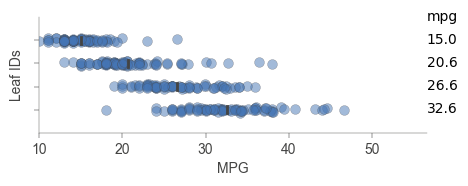

In [40]:
viz5.rtree_leaf_distributions(figsize=(5,1.5))

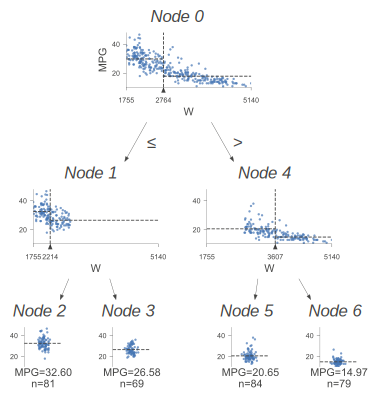

In [41]:
viz5.view(show_node_labels=True, scale=1.2)

# How decision trees predict a value for an instance in regression trees

In [42]:
x=df_cars.iloc[20,:]

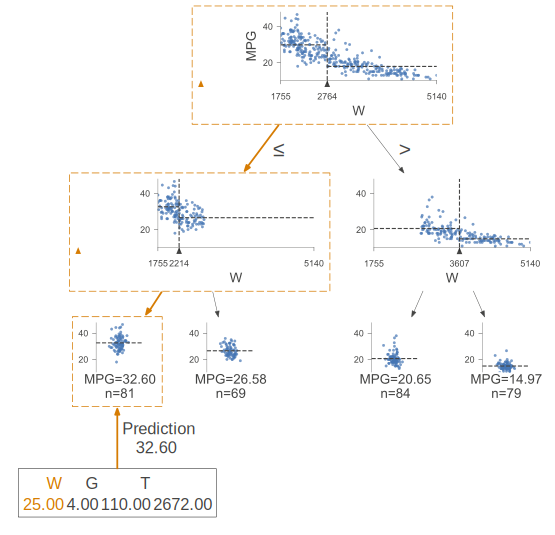

In [43]:
viz5.view(x=x, scale=1.5)

# Show just path 

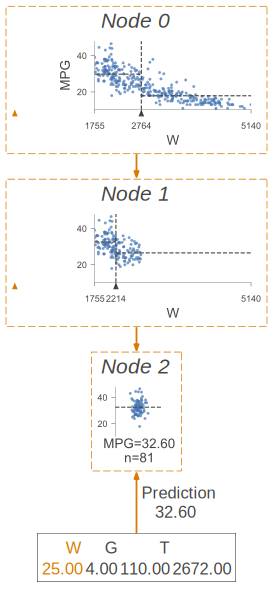

In [44]:
viz5.view(x=x, show_just_path=True, scale=1.5, orientation='TB', show_node_labels=True)

# Explain prediction in Plain English

In [45]:
print(viz5.explain_prediction_path(x=x))

W < 2214.5



# **Important**
### You should use the rtree_feature_space, rtree_feature_space3D rather than the rtree_univar otherwise deprecation warning error occur. 

# Regression tree Univariate Analysis

In [46]:
viz6=dtreeviz.model(
 dtr, 
 X_train= X_train,
 y_train= Y_train,
 target_name='MPG',
 feature_names='WGT'
)

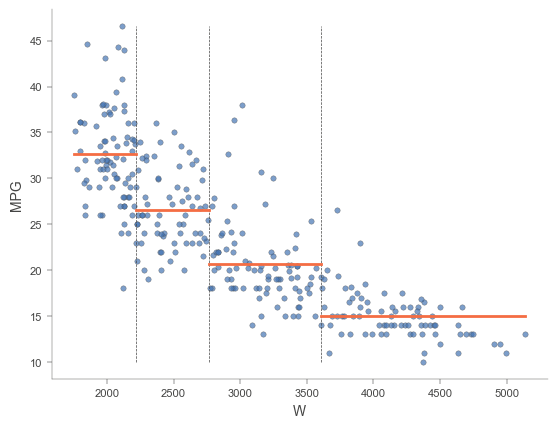

In [47]:
viz6.rtree_feature_space(features=['WGT'], show={'splits', 'legend'})

# Regression tree bivariate Analysis

In [48]:
X1= df_cars[['WGT', 'ENG']]
Y1= df_cars['MPG']

In [49]:
X_train, X_test, Y_train, Y_test=train_test_split(X1,Y1,test_size=0.2,random_state=2)

In [50]:
dt1= DecisionTreeRegressor(max_depth=5, criterion='squared_error')

In [51]:
dt1.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5)

In [52]:
viz7= dtreeviz.model(
 dt1, 
 X_train= X_train,
 y_train= Y_train,
 target_name='MPG',
 feature_names=['ENG','WGT']
)

# Visualize in 2D Plane

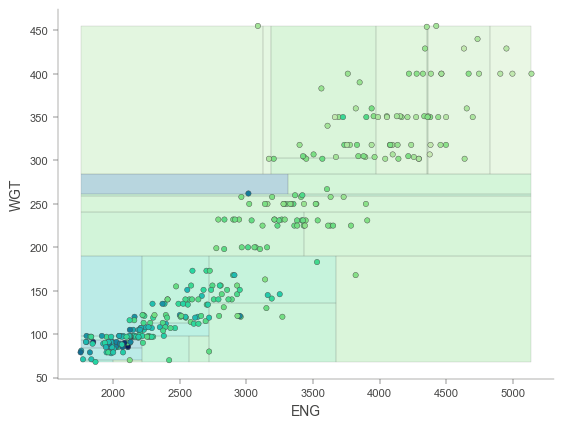

In [53]:
viz7.rtree_feature_space(features=['ENG', 'WGT'], show={'splits', 'legend'})

# Visualize in 3D HyperPlane

c:\Users\SC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


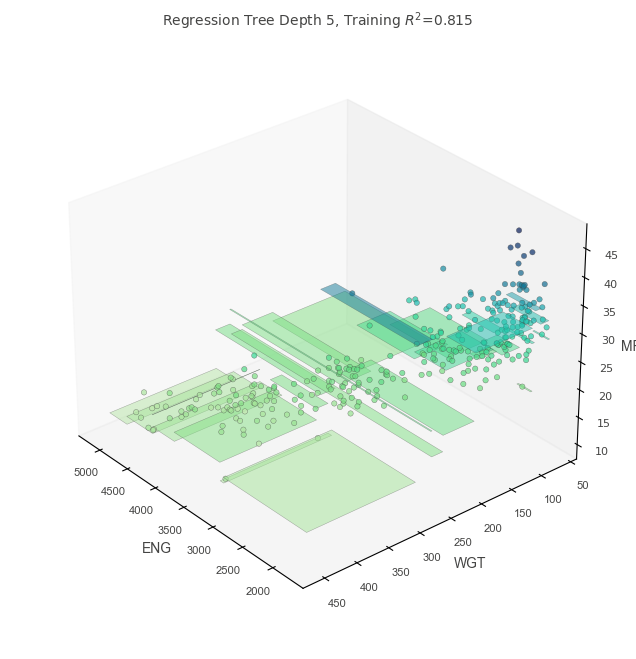

In [54]:
viz7.rtree_feature_space3D(features=['ENG', 'WGT'], elev=30, azim=140, dist=11, figsize=(9,8))